# **Conjunto de dados de previsão e análise de ataque cardíaco**

Um conjunto de dados para classificação de ataque cardíaco

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#analise geral e importação dos dados e bibliotecas

In [1]:
#importação das bibliotecas
import pandas as pd
import seaborn as sns

In [3]:
#lendo o arquivo .CSV
df = pd.read_excel('heart.xlsx')

In [4]:
#verificando a quantida de linhas e colunas do data frame
df.shape

(303, 14)

In [5]:
#verificando a presença de NAs e verificando tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    object 
 10  slp       303 non-null    float64
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
dtypes: float64(13), object(1)
memory usage: 33.3+ KB


In [6]:
#analisando as informações do data frame
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2022-03-02 00:00:00,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,2022-05-03 00:00:00,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,2022-04-01 00:00:00,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


#criação de um novo data frame somente com pessoas com pretensão de infarto e inclusão da coluna faixa_etaria

In [12]:
pessoas_c_pretensao = df[df['output'] == 1]

In [23]:
pessoas_c_pretensao['age'].unique()

array([63., 37., 41., 56., 57., 44., 52., 54., 48., 49., 64., 58., 50.,
       66., 43., 69., 59., 42., 61., 40., 71., 51., 65., 53., 46., 45.,
       39., 47., 62., 34., 35., 29., 55., 60., 67., 68., 74., 76., 70.,
       38.])

In [24]:
faixa_etaria = []
for i in pessoas_c_pretensao['age'].values:
    if (i < 29):
        faixa_etaria.append('0 --| 28')
    elif (i >= 29 and i < 37):
        faixa_etaria.append('29 --| 37')
    elif (i >= 37 and i < 45):
        faixa_etaria.append('37 --| 45')
    elif (i >= 45 and i < 53):
        faixa_etaria.append('45 --| 53')
    elif (i >= 53 and i < 61):
        faixa_etaria.append('53 --| 61')
    elif (i >= 61 and i < 69):
        faixa_etaria.append('61 --| 69')
    elif (i >= 69):
        faixa_etaria.append('69 --| 77')
    else:
        faixa_etaria.append('78 --| 100')

In [26]:
pessoas_c_pretensao['faixa_etaria'] = faixa_etaria

C:\Users\md_di\AppData\Local\Temp\ipykernel_9104\1697926097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pessoas_c_pretensao['faixa_etaria'] = faixa_etaria


#analise grafica de algumas informações do data frame

In [ ]:
#verificando a média da dor sentida por pessoas sem e com pretensão de infarto
media_dor = df.groupby('output').mean()['cp']

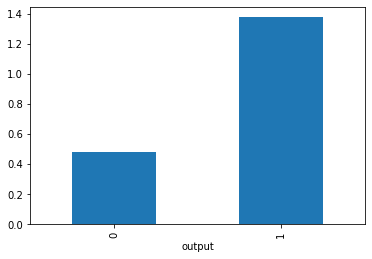

In [ ]:
media_dor.plot(kind='bar')

In [ ]:
#filtro somente das pessoas com mais chance de ataque cardíaco
pessoas_c_pretensao = df[df['output'] == 1]

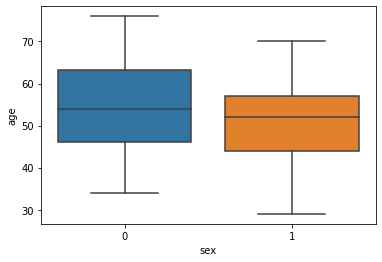

In [ ]:
#verificando a distribuição - de pessoas com mais chance de ataque cardíaco - por sexo e idade
sns.boxplot(data=pessoas_c_pretensao, x='sex', y='age')

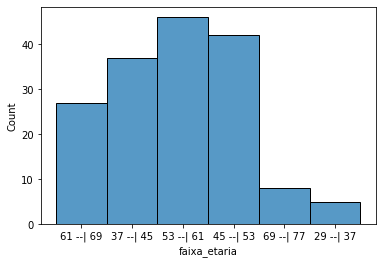

In [ ]:
#verificando a quantidade - de pessoas com mais chance de ataque cardíaco - por faixa etaria
sns.histplot(data=pessoas_c_pretensao, x='faixa_etaria')

#analisando os quartis, data frame geral, do colesterol medido dos pacientes (coluna chol)

In [ ]:
pessoas_c_pretensao = df[df['output'] == 1]

In [ ]:
pessoas_c_pretensao['chol'].describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

In [ ]:
pessoas_s_pretensao = df[df['output'] == 0]

In [ ]:
pessoas_s_pretensao['chol'].describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

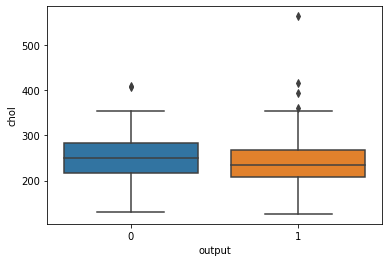

In [ ]:
sns.boxplot(data=df, x='output', y='chol')